**SAMPLING**

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def image_sampling(input_image_path, sampling_factor,interpolation_method):
    # Read the image using cv2
    original_image = cv2.imread(input_image_path)
    new_size = (original_image.shape[1] // sampling_factor, original_image.shape[0] // sampling_factor)

    if interpolation_method == 'nearest':
        downsampled_image = cv2.resize(original_image, new_size, interpolation=cv2.INTER_NEAREST)
    elif interpolation_method == 'linear':
        downsampled_image = cv2.resize(original_image, new_size, interpolation=cv2.INTER_LINEAR)
    elif interpolation_method == 'cubic':
        downsampled_image = cv2.resize(original_image, new_size, interpolation=cv2.INTER_CUBIC)
    elif interpolation_method == 'average_pooling':
        downsampled_image = cv2.resize(original_image, new_size, interpolation=cv2.INTER_AREA)
    return downsampled_image
# Path to the input image
input_image_path = "/content/flam.jpeg"
# Sampling factors
sampling_factors = [2, 4, 8, 16]
original_image = cv2.imread('flam.jpeg')

NEAREST NEIGHBOUR

Original Image


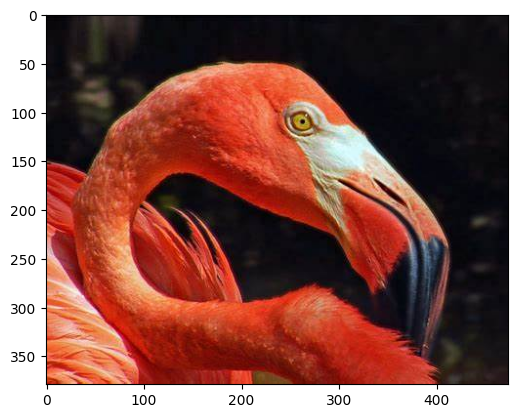

Downsampled 2x


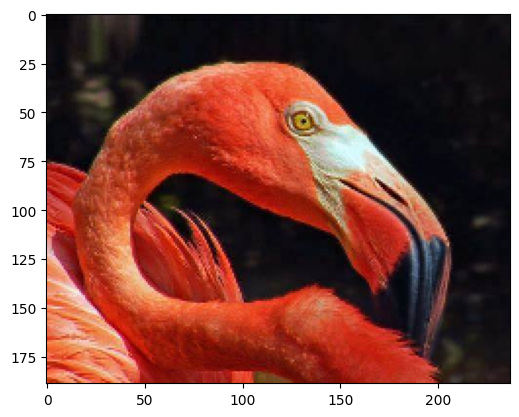

Downsampled 4x


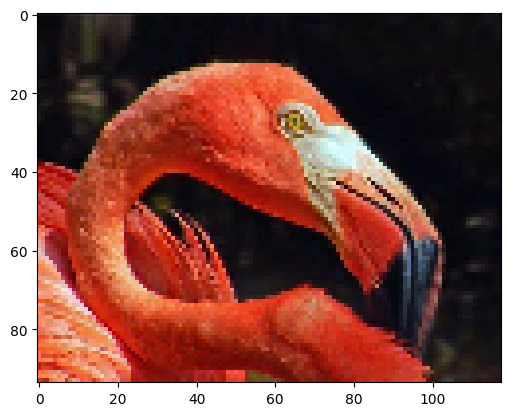

Downsampled 8x


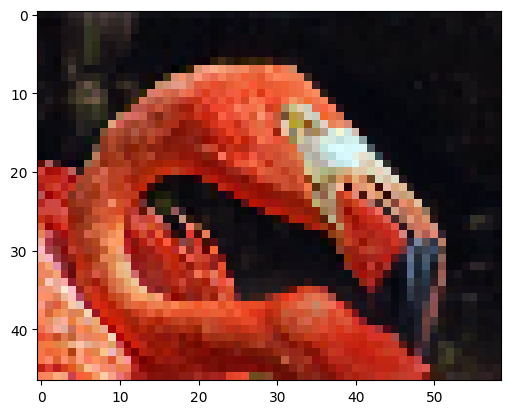

Downsampled 16x


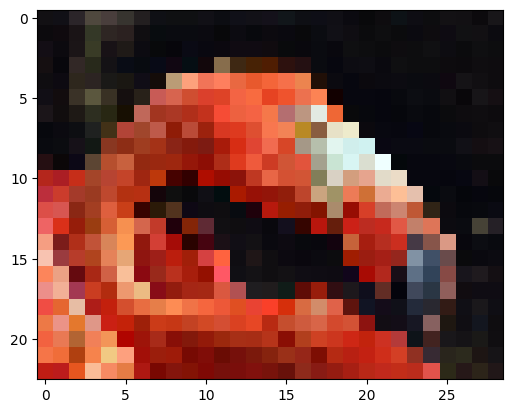

In [15]:
print('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.show()
for factor in sampling_factors:
    downsampled_image = image_sampling(input_image_path, factor,'nearest')
    print(f'Downsampled {factor}x')
    plt.imshow(cv2.cvtColor(downsampled_image, cv2.COLOR_BGR2RGB))
    plt.show()

BILINEAR INTERPOLATION-Visually Smoother

Original Image


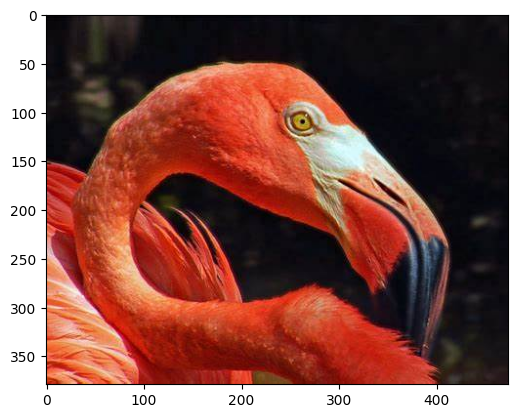

Downsampled 2x


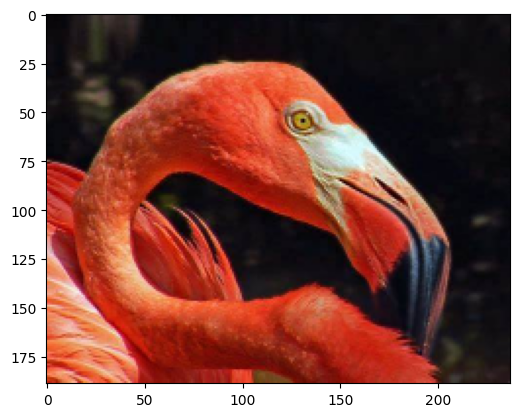

Downsampled 4x


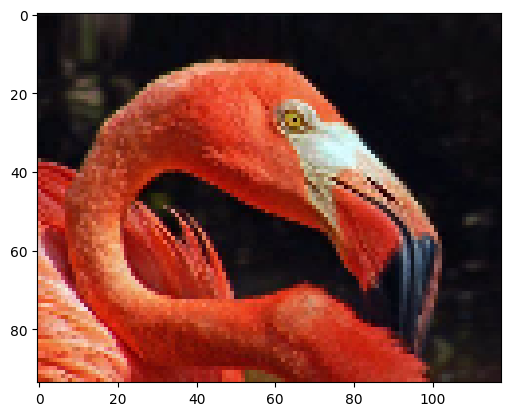

Downsampled 8x


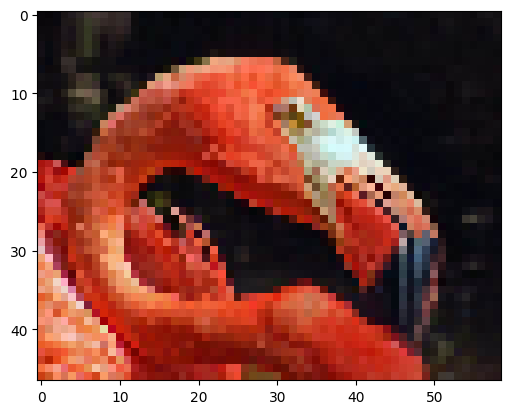

Downsampled 16x


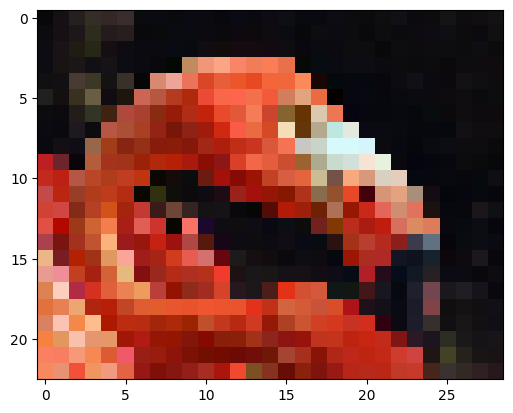

In [16]:
print('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.show()
for factor in sampling_factors:
    downsampled_image = image_sampling(input_image_path, factor,'linear')
    print(f'Downsampled {factor}x')
    plt.imshow(cv2.cvtColor(downsampled_image, cv2.COLOR_BGR2RGB))
    plt.show()

BICUBIC INTERPOLATION-More Visually Smoothing

Original Image


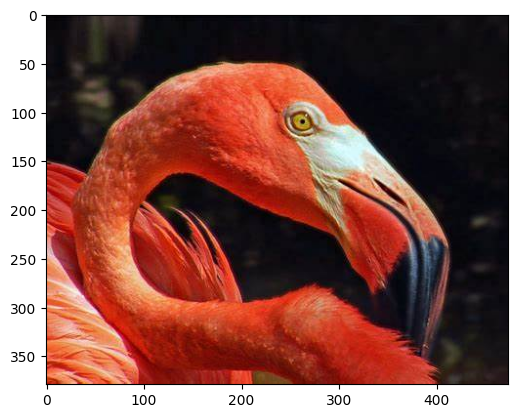

Downsampled 2x


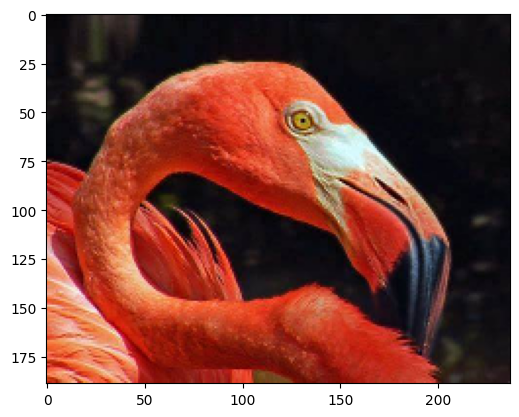

Downsampled 4x


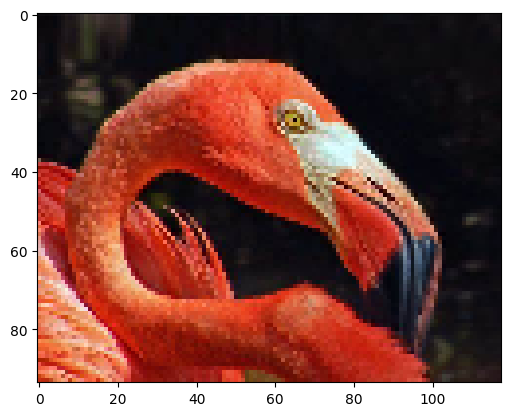

Downsampled 8x


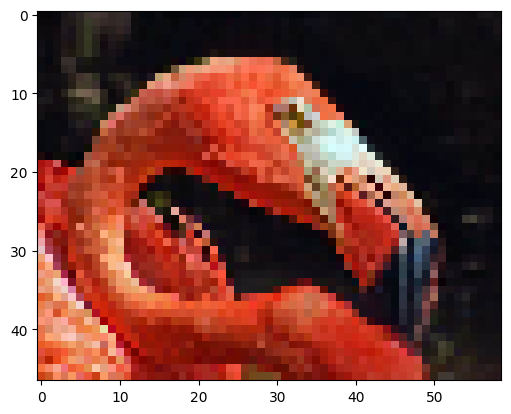

Downsampled 16x


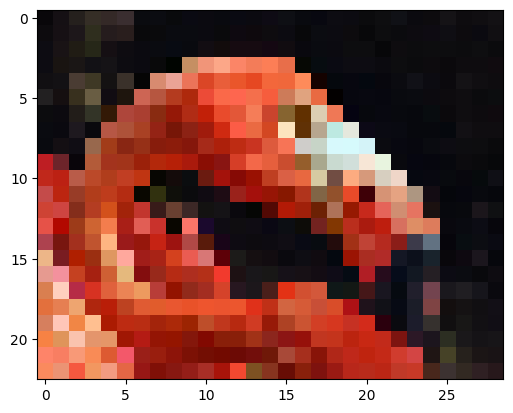

In [17]:
print('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.show()
for factor in sampling_factors:
    downsampled_image = image_sampling(input_image_path, factor,'cubic')
    print(f'Downsampled {factor}x')
    plt.imshow(cv2.cvtColor(downsampled_image, cv2.COLOR_BGR2RGB))
    plt.show()

AVERAGE POOLING

Original Image


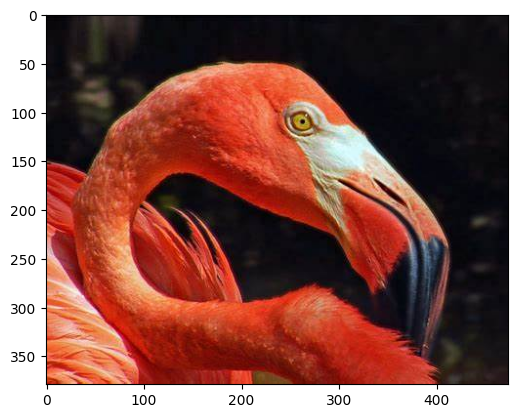

Downsampled 2x


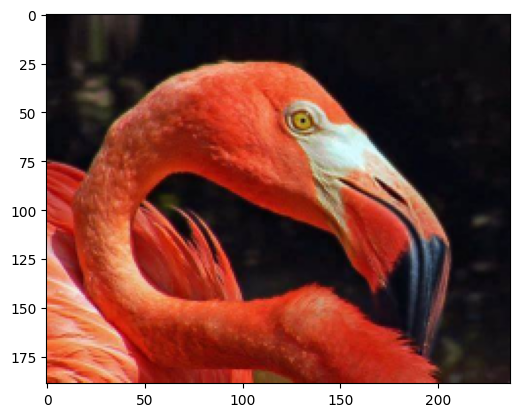

Downsampled 4x


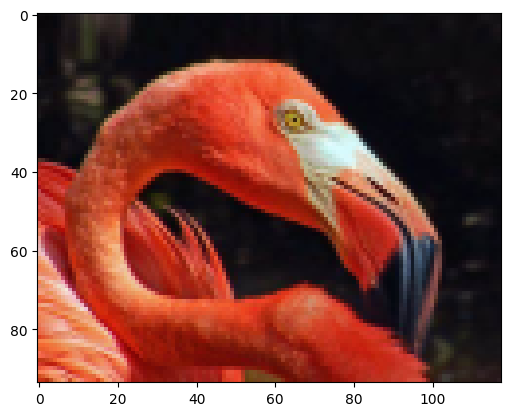

Downsampled 8x


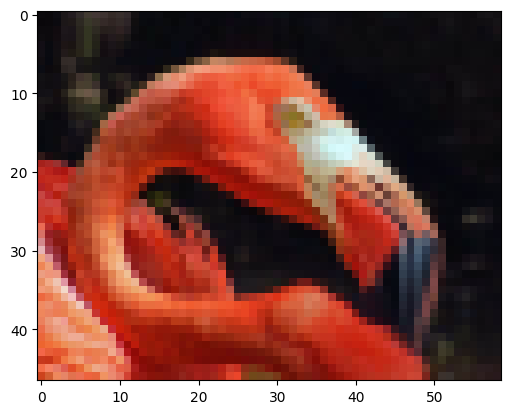

Downsampled 16x


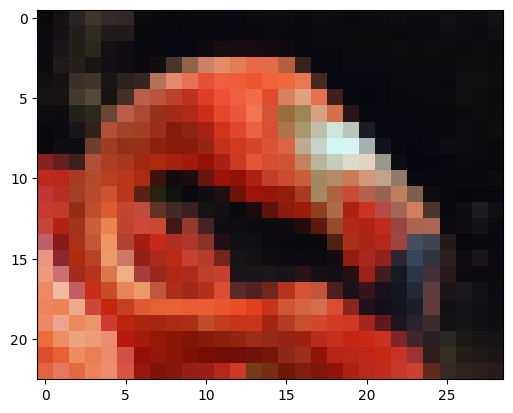

In [18]:
print('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.show()
for factor in sampling_factors:
    downsampled_image = image_sampling(input_image_path, factor,'average_pooling')
    print(f'Downsampled {factor}x')
    plt.imshow(cv2.cvtColor(downsampled_image, cv2.COLOR_BGR2RGB))
    plt.show()

Original Image


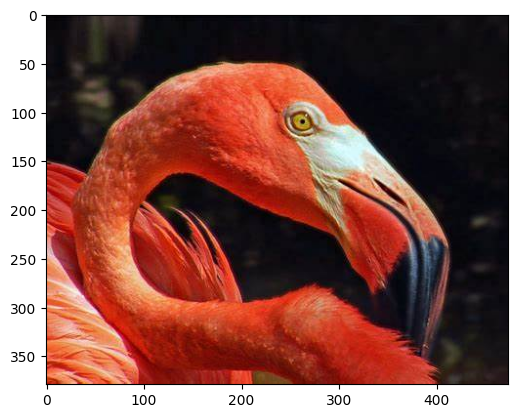

Downsampled 2x


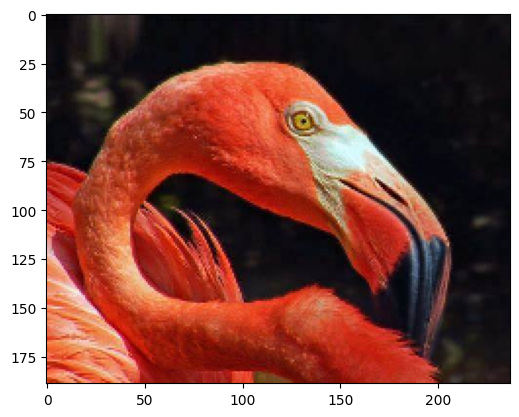

Downsampled 4x


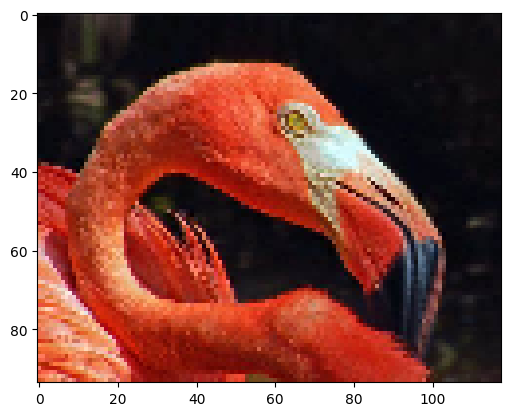

Downsampled 8x


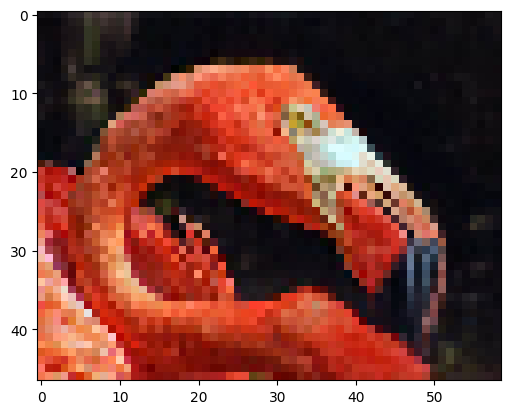

Downsampled 16x


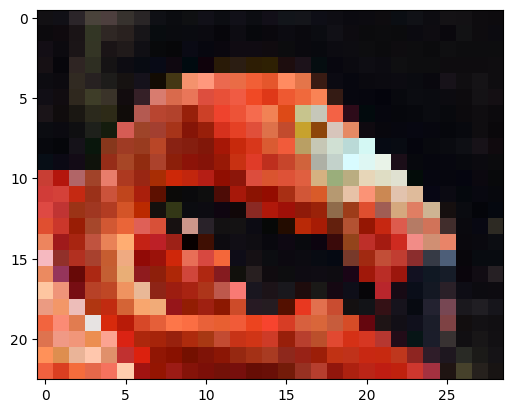

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
original_image = cv2.imread('flam.jpeg')
m, n, _ = original_image.shape
print('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.show()
downsampling_factors = [2, 4, 8, 16]
for f in downsampling_factors:
    img2 = np.zeros((m // f, n // f, 3), dtype=np.uint8)
    for i in range(0, m, f):
        for j in range(0, n, f):
            try:
                img2[i // f, j // f, :] = original_image[i, j, :]
            except IndexError:
                pass
    print(f'Downsampled {f}x')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.show()


**QUANTIZATION**

Using grayscale image

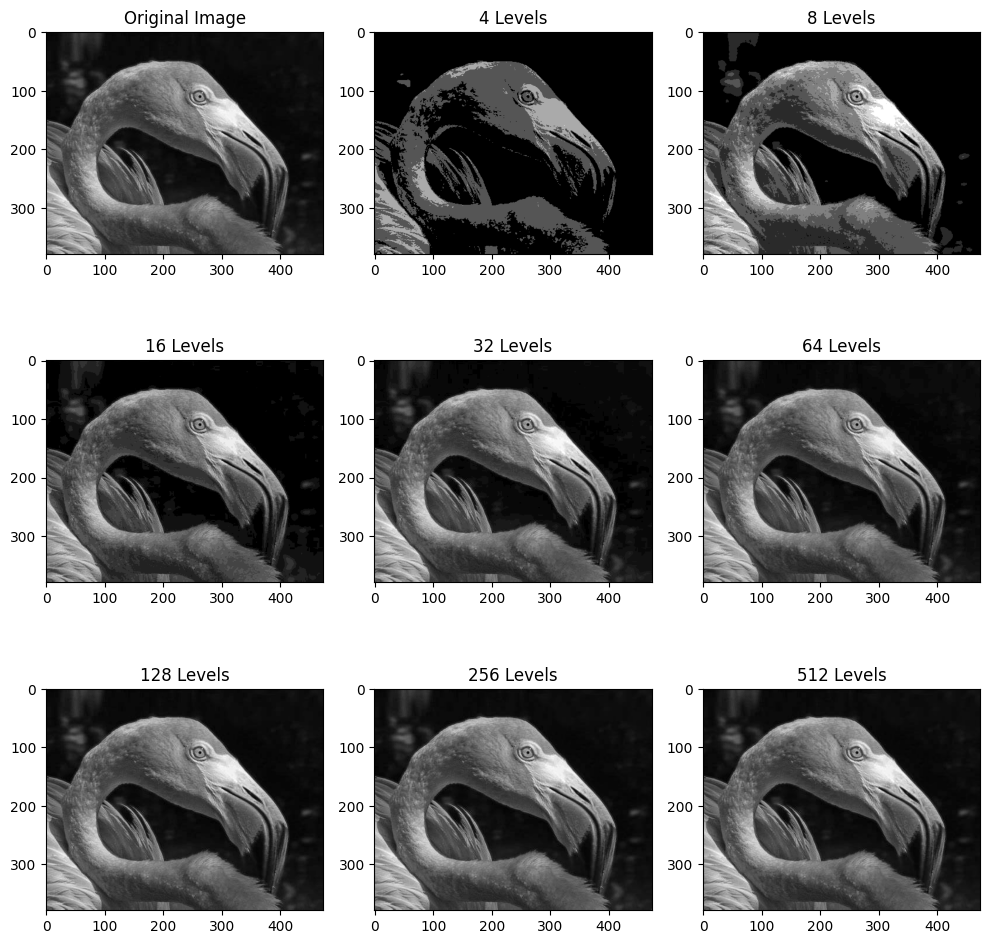

In [20]:
import cv2
import matplotlib.pyplot as plt

def quantize_image(image, levels):

  # Get the maximum intensity value
  max_intensity = image.max()

  # Calculate the quantization step size
  step_size = max_intensity / (levels - 1)

  # Quantize each pixel
  quantized_image = np.floor(image / step_size) * step_size

  return quantized_image

# Load the image
image = cv2.imread("flam.jpeg")

# Convert image to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Quantize the image for different levels
quantized_images = {
    4: quantize_image(image.copy(), 4),
    8: quantize_image(image.copy(), 8),
    16: quantize_image(image.copy(), 16),
    32: quantize_image(image.copy(), 32),
    64: quantize_image(image.copy(), 64),
    128: quantize_image(image.copy(), 128),
    256: quantize_image(image.copy(), 256),
    512: quantize_image(image.copy(), 512)

}

# Show the original and quantized images
plt.figure(figsize=(10, 10))

plt.subplot(3, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

for i, (levels, quantized_image) in enumerate(quantized_images.items(), start=2):
  plt.subplot(3, 3, i)
  plt.imshow(quantized_image,cmap='gray')
  plt.title(f"{levels} Levels")

plt.tight_layout()
plt.show()


Normalizing channels because channel values crossing maximum value allowed(255)

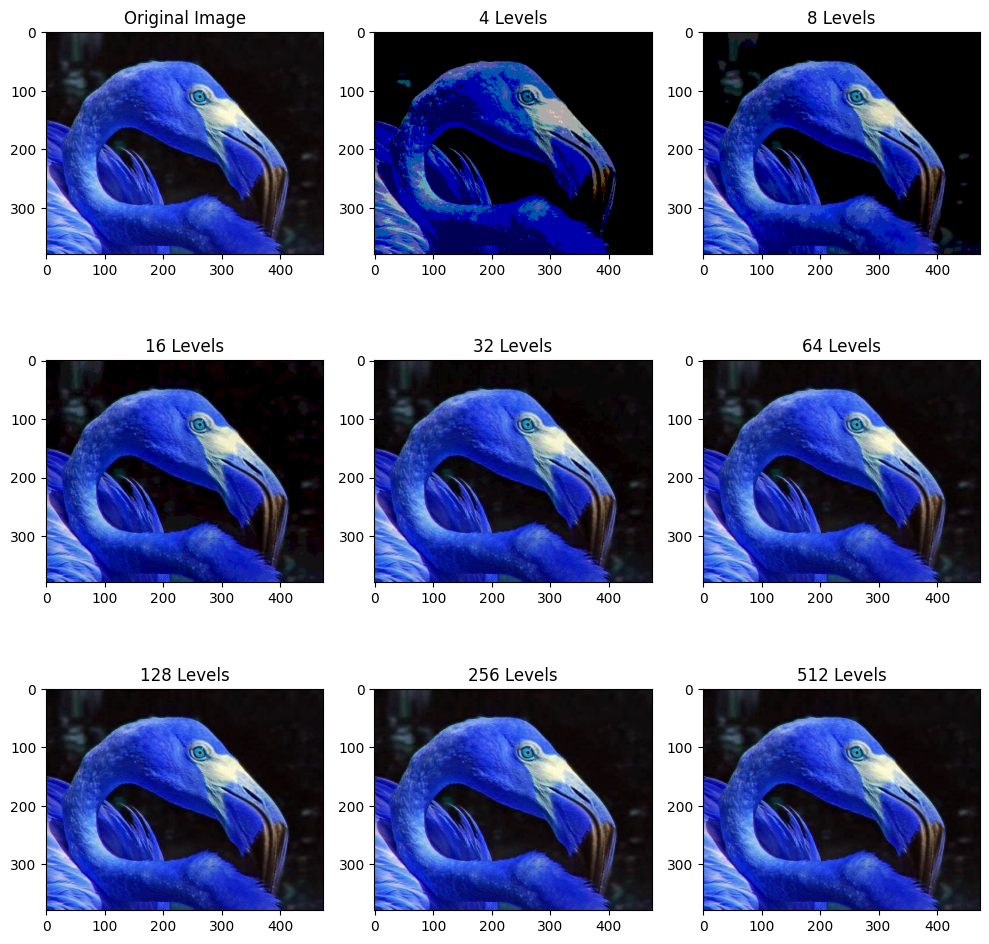

In [21]:
import cv2
import matplotlib.pyplot as plt

def quantize_image(image, levels):

  # Split the image into BGR channels
  channels = cv2.split(image)

  # Calculate minimum and maximum intensities across the entire image (not per channel)
  min_value, max_value = image.min(), image.max()

  # Calculate quantization step sizes for each channel
  step_sizes = [(max_value - min_value) / (levels - 1) for _ in channels]

  # Quantize each channel individually
  quantized_channels = []
  for channel, step_size in zip(channels, step_sizes):
    quantized_channel = np.floor(channel / step_size) * step_size
    normalized_channel = (quantized_channel - min_value) / (max_value - min_value) * 255
    quantized_channels.append(normalized_channel.astype(np.uint8))

  # Merge quantized channels back into a single image
  quantized_image = cv2.merge(quantized_channels)

  return quantized_image

# Load the image
image = cv2.imread("flam.jpeg")

# Quantize the image for different levels
quantized_images = {
    4: quantize_image(image.copy(), 4),
    8: quantize_image(image.copy(), 8),
    16: quantize_image(image.copy(), 16),
    32: quantize_image(image.copy(), 32),
    64: quantize_image(image.copy(), 64),
    128: quantize_image(image.copy(), 128),
    256: quantize_image(image.copy(), 256),
    512: quantize_image(image.copy(), 512),
}

# Show the original and quantized images
plt.figure(figsize=(10, 10))

plt.subplot(3, 3, 1)
plt.imshow(image)
plt.title("Original Image")

for i, (levels, quantized_image) in enumerate(quantized_images.items(), start=2):
  plt.subplot(3, 3, i)
  plt.imshow(quantized_image)
  plt.title(f"{levels} Levels")

plt.tight_layout()
plt.show()


Without normalization

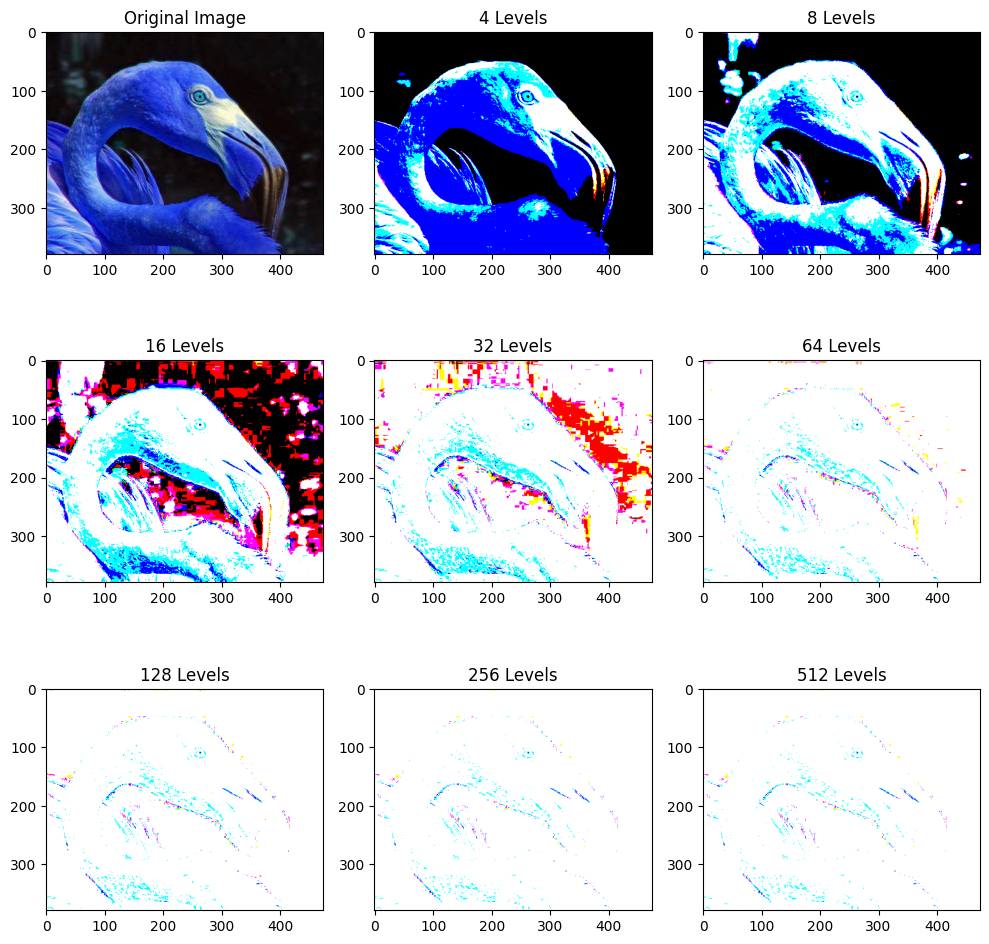

In [22]:
import cv2
import matplotlib.pyplot as plt
 # Load the image
image1 = cv2.imread("flam.jpeg")
plt.figure(figsize=(10, 10))

plt.subplot(3, 3, 1)
plt.imshow(image1)
plt.title("Original Image")
image = cv2.imread("flam.jpeg")
def quantize_image(image, levels):

  # Split the image into BGR channels
  channels = cv2.split(image)

  # Calculate maximum intensity for each channel
  max_intensities = [channel.max() for channel in channels]

  # Calculate quantization step size for each channel
  step_sizes = [max_intensity / (levels - 1) for max_intensity in max_intensities]

  # Quantize each channel individually
  quantized_channels = []
  for channel, step_size in zip(channels, step_sizes):
    quantized_channel = np.floor(channel / step_size) * step_size
    quantized_channels.append(quantized_channel)

  # Merge quantized channels back into a single image
  quantized_image = cv2.merge(quantized_channels)

  return quantized_image


# Quantize the image for different levels
quantized_images = {
    4: quantize_image(image.copy(), 4),
    8: quantize_image(image.copy(), 8),
    16: quantize_image(image.copy(), 16),
    32: quantize_image(image.copy(), 32),
    64: quantize_image(image.copy(), 64),
    128: quantize_image(image.copy(), 128),
    256: quantize_image(image.copy(), 256),
    512: quantize_image(image.copy(), 512),
}


for i, (levels, quantized_image) in enumerate(quantized_images.items(), start=2):
  plt.subplot(3, 3, i)
  plt.imshow(quantized_image)

  plt.title(f"{levels} Levels")

plt.tight_layout()
plt.show()
